# Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline


In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/envs/learn-env

In [51]:
# Importing Dataset
X = pd.read_csv('datasets/Tanzanian/training_set.csv')
target = pd.read_csv('datasets/Tanzanian/train_result.csv')


# Examining necessary columns

In [3]:
X.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [21]:
X.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [14]:
# columns taht will be dropped will be added here
cols_to_drop = []

## amount_tsh

<AxesSubplot:>

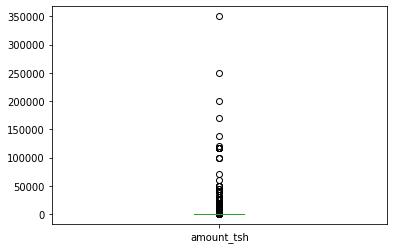

In [10]:
# Total static head (amount water available to waterpoint)
X['amount_tsh'].plot(kind='box')

In [12]:
X['amount_tsh'].value_counts(normalize=True)

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

> 70% of the data is 0 (probability missing). Drop the column

In [15]:
cols_to_drop.append('amount_tsh')

## date_recorded 

In [ ]:
# The date the row was entered
""" 
Change to datetime format and extact month and year to see whether there is
sort of pattern where clusters of wells do not function well
when they were recorded in certain period of time
"""

## funder

In [17]:
# Who funded the well
X['funder'].value_counts(normalize=True)

Government Of Tanzania          0.162898
Danida                          0.055841
Hesawa                          0.039487
Rwssp                           0.024639
World Bank                      0.024191
                                  ...   
Japan  Food Aid Counter Part    0.000018
Tancan                          0.000018
Msikiti Masji                   0.000018
Robert Kampala                  0.000018
Revocatus Mahatane              0.000018
Name: funder, Length: 1897, dtype: float64

In [20]:
X['funder'].isna().sum()/len(X['funder'])*100

6.11952861952862

> impute using "MISSING"

## wpt_name

In [23]:
# Name of the waterpoint if there is one
X['wpt_name'].value_counts()

none                      3563
Shuleni                   1748
Zahanati                   830
Msikitini                  535
Kanisani                   323
                          ... 
Kwa Teresia Gaspal           1
Kwa Ngwabo                   1
Kwamtumbika                  1
Malindi Primary School       1
Kwa Mzee Mwandwile           1
Name: wpt_name, Length: 37400, dtype: int64

> Make this into a boolean column. So checks if there is a name or not. Maybe having a name makes a difference in terms of how much people care and have a ownership of their wells.


In [24]:
X['wpt_name'].isna().sum()

0

## num_private

In [25]:
X['num_private'].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

> no information about this column was given. So it will be dropped.

In [26]:
cols_to_drop.append('num_private')

## Geographical Locations

In [27]:
# The following columns are all geogrphical locations
geo_cols = ['basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward']


In [28]:
X[geo_cols]

,basin,subvillage,region,region_code,district_code,lga,ward
0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi
1,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta
2,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika
3,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu
4,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi
...,...,...,...,...,...,...,...
59395,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi
59396,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo
59397,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala
59398,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu


In [30]:
len(X['lga'].unique())

125

In [31]:
len(X['ward'].unique())

2092

> Drop 'basin', 'subvillage', 'region', 'lga', 'ward' and leave region code and district code.

In [41]:
cols_to_drop += ['basin', 'subvillage', 'region', 'lga', 'ward']

## population

In [46]:
# Population around the well
X['population'].value_counts(normalize=True)

0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     0.028300
          ...   
3241    0.000017
1960    0.000017
1685    0.000017
2248    0.000017
1439    0.000017
Name: population, Length: 1049, dtype: float64

In [47]:
X['population'].isna().sum()

0

> Even though 36% is missing data, we will first try to impute using median

## recorded_by

In [49]:
X['recorded_by'].value_counts(normalize=True)

GeoData Consultants Ltd    1.0
Name: recorded_by, dtype: float64

> Drop this since all the same.

In [50]:
cols_to_drop.append('recorded_by')

## scheme_management and scheme_name

In [51]:
# who operates the waterpoint?
X[['scheme_management', 'scheme_name']]

,scheme_management,scheme_name
0,VWC,Roman
1,Other,NaN
2,VWC,Nyumba ya mungu pipe scheme
3,VWC,NaN
4,NaN,NaN
...,...,...
59395,Water Board,Losaa Kia water supply
59396,VWC,Ikondo electrical water sch
59397,VWC,NaN
59398,VWC,NaN


In [53]:
X['scheme_management'].isna().sum(), X['scheme_name'].isna().sum()

(3877, 28166)

> Drop 'scheme_name' and impute scheme_management with 'MISSING' value.

In [89]:
cols_to_drop.append('scheme_name')

## permit

In [57]:
X['permit'].value_counts(normalize=True)

True     0.68955
False    0.31045
Name: permit, dtype: float64

In [58]:
X['permit'].isna().sum()

3056

> Impute using 'MISSING'

## Extractions

In [61]:
"""
extraction_type - The kind of extraction the waterpoint uses
extraction_type_group - The kind of extraction the waterpoint uses
extraction_type_class - The kind of extraction the waterpoint uses
"""

X[['extraction_type', 'extraction_type_group', 'extraction_type_class']]

,extraction_type,extraction_type_group,extraction_type_class
0,gravity,gravity,gravity
1,gravity,gravity,gravity
2,gravity,gravity,gravity
3,submersible,submersible,submersible
4,gravity,gravity,gravity
...,...,...,...
59395,gravity,gravity,gravity
59396,gravity,gravity,gravity
59397,swn 80,swn 80,handpump
59398,nira/tanira,nira/tanira,handpump


> similar columns so will just use 'extraction_type'

In [62]:
X['extraction_type'].isna().sum()

0

In [63]:
cols_to_drop += ['extraction_type_group', 'extraction_type_class']

## management

In [64]:
# how the waterpoint is managed
X[['management', 'management_group']]

,management,management_group
0,vwc,user-group
1,wug,user-group
2,vwc,user-group
3,vwc,user-group
4,other,other
...,...,...
59395,water board,user-group
59396,vwc,user-group
59397,vwc,user-group
59398,vwc,user-group


In [65]:
X['management'].value_counts(normalize=True)

vwc                 0.681936
wug                 0.109680
water board         0.049377
wua                 0.042677
private operator    0.033182
parastatal          0.029764
water authority     0.015219
other               0.014209
company             0.011532
unknown             0.009444
other - school      0.001667
trust               0.001313
Name: management, dtype: float64

In [66]:
X['management_group'].value_counts(normalize=True)

user-group    0.883670
commercial    0.061246
parastatal    0.029764
other         0.015875
unknown       0.009444
Name: management_group, dtype: float64

> keep both columns

## payment

In [67]:
X[['payment', 'payment_type']]

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
3,never pay,never pay
4,never pay,never pay
...,...,...
59395,pay per bucket,per bucket
59396,pay annually,annually
59397,pay monthly,monthly
59398,never pay,never pay


> Use 'payment_type' and drop 'payment'

In [68]:
cols_to_drop.append('payment')

## water_quality, quality_group

In [70]:
X[['quality_group', 'water_quality']]

,quality_group,water_quality
0,good,soft
1,good,soft
2,good,soft
3,good,soft
4,good,soft
...,...,...
59395,good,soft
59396,good,soft
59397,fluoride,fluoride
59398,good,soft


In [71]:
X['quality_group'].value_counts(normalize=True)

good        0.855522
salty       0.087458
unknown     0.031582
milky       0.013535
colored     0.008249
fluoride    0.003653
Name: quality_group, dtype: float64

In [72]:
X['water_quality'].value_counts(normalize=True)

soft                  0.855522
salty                 0.081751
unknown               0.031582
milky                 0.013535
coloured              0.008249
salty abandoned       0.005707
fluoride              0.003367
fluoride abandoned    0.000286
Name: water_quality, dtype: float64

> Use 'quality_group' and drop 'water_quality'

In [73]:
cols_to_drop.append('water_quality')

## Source

In [74]:
X[['source', 'source_type', 'source_class']]

,source,source_type,source_class
0,spring,spring,groundwater
1,rainwater harvesting,rainwater harvesting,surface
2,dam,dam,surface
3,machine dbh,borehole,groundwater
4,rainwater harvesting,rainwater harvesting,surface
...,...,...,...
59395,spring,spring,groundwater
59396,river,river/lake,surface
59397,machine dbh,borehole,groundwater
59398,shallow well,shallow well,groundwater


In [75]:
X['source'].value_counts(normalize=True)

spring                  0.286549
shallow well            0.283232
machine dbh             0.186448
river                   0.161818
rainwater harvesting    0.038636
hand dtw                0.014714
lake                    0.012879
dam                     0.011044
other                   0.003569
unknown                 0.001111
Name: source, dtype: float64

In [77]:
X['source_class'].value_counts(normalize=True)

groundwater    0.770943
surface        0.224377
unknown        0.004680
Name: source_class, dtype: float64

> keep 'source' and 'source_class' and drop 'source_type'

In [80]:
cols_to_drop.append('source_type')

## Quantity

In [81]:
X[['quantity', 'quantity_group']]

,quantity,quantity_group
0,enough,enough
1,insufficient,insufficient
2,enough,enough
3,dry,dry
4,seasonal,seasonal
...,...,...
59395,enough,enough
59396,enough,enough
59397,enough,enough
59398,insufficient,insufficient


> drop 'quantity_group'

In [82]:
cols_to_drop.append('quantity_group')

## waterpoint type

In [83]:
X[['waterpoint_type', 'waterpoint_type_group']]

,waterpoint_type,waterpoint_type_group
0,communal standpipe,communal standpipe
1,communal standpipe,communal standpipe
2,communal standpipe multiple,communal standpipe
3,communal standpipe multiple,communal standpipe
4,communal standpipe,communal standpipe
...,...,...
59395,communal standpipe,communal standpipe
59396,communal standpipe,communal standpipe
59397,hand pump,hand pump
59398,hand pump,hand pump


> drop 'waterpoint_type' since group seems more general.


In [84]:
cols_to_drop.append('waterpoint_type')

# Columns to drop

In [92]:
cols_to_drop

['amount_tsh',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'recorded_by',
 'extraction_type_group',
 'extraction_type_class',
 'payment',
 'water_quality',
 'source_type',
 'quantity_group',
 'waterpoint_type',
 'scheme_name']

In [8]:
# cols_to_drop = ['amount_tsh',
#  'num_private',
#  'basin',
#  'subvillage',
#  'region',
#  'lga',
#  'ward',
#  'recorded_by',
#  'extraction_type_group',
#  'extraction_type_class',
#  'payment',
#  'water_quality',
#  'source_type',
#  'quantity_group',
#  'waterpoint_type',
#  'scheme_name']

# Feature Engineering Test

In [9]:
df = pd.concat([X.drop(columns=cols_to_drop), y], axis=1)

In [14]:
# df.drop(columns='id', inplace=True)

In [15]:
df

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,region_code,district_code,population,...,extraction_type,management,management_group,payment_type,quality_group,quantity,source,source_class,waterpoint_type_group,status_group
0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,11,5,109,...,gravity,vwc,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
1,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,20,2,280,...,gravity,wug,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,21,4,250,...,gravity,vwc,user-group,per bucket,good,enough,dam,surface,communal standpipe,functional
3,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,90,63,58,...,submersible,vwc,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe,non functional
4,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,18,1,0,...,gravity,other,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,3,5,125,...,gravity,water board,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,functional
59396,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,11,4,56,...,gravity,vwc,user-group,annually,good,enough,river,surface,communal standpipe,functional
59397,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,12,7,0,...,swn 80,vwc,user-group,monthly,fluoride,enough,machine dbh,groundwater,hand pump,functional
59398,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,1,4,0,...,nira/tanira,vwc,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,functional


In [40]:
import math
def get_distance(x, y):
    """
    x = [lat and long]
    y = array of lat and long
    """
    pi = np.pi
    R = 6371 # Average Earth radius in km
    
    # converts to radians
    lat1 = x[0]*pi/180 
    lat2 = y.iloc[:,0]*pi/180
    long1 = x[1]*pi/180
    long2 = y.iloc[:,1]*pi/180

    # finds delta angles
    del_lat = lat1 - lat2
    del_long = long1 - long2
        
    # Source: https://www.movable-type.co.uk/
    a = np.sin(del_lat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(del_long/2)**2
    c = 2*np.arctan(np.sqrt(a)/np.sqrt(1-a))
    d= R*c # distance in km
        
    return d

In [79]:
perc_func_near = []
perc_non_func_near = []
perc_repair_near = []

for index, row in df.iterrows():
#     print(index, row['latitude'], row['longitude'])
    wp = [row['latitude'], row['longitude']]
    wps = df[['latitude', 'longitude']].copy()
    
    d = get_distance(wp, wps)
    
    distance = 50
    indices = df[d < distance].index
    
    perc_func = round(np.sum(target.iloc[indices, :] == 'functional')/len(indices)*100, 2)
    perc_non_func = round(np.sum(target.iloc[indices, :] == 'non functional')/len(indices)*100, 2)
    perc_repair_func = round(np.sum(target.iloc[indices, :] == 'functional needs repair')/len(indices)*100, 2)
    
    perc_func_near.append(perc_func[0])
    perc_non_func_near.append(perc_non_func[0])
    perc_repair_near.append(perc_repair_func[0])
    

    

In [81]:
target['func'] = perc_func_near
target['non_func'] = perc_non_func_near
target['repair'] = perc_repair_near

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='func', ylabel='non_func'>

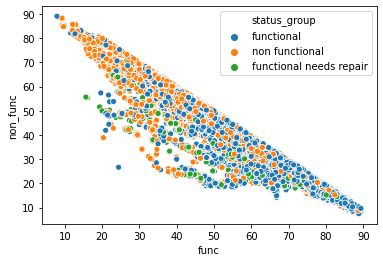

In [83]:
sns.scatterplot(x='func', y='non_func', hue='status_group', data=target)

# test 2

(28.0, 42.0)

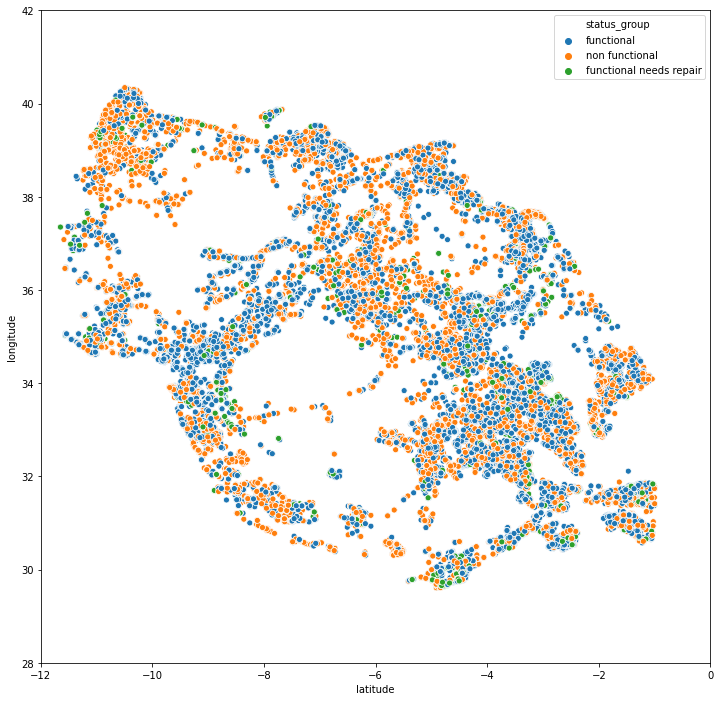

In [87]:
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x='latitude', y='longitude', 
                hue='status_group', data=df, ax=ax)
plt.xlim(-12, 0)
plt.ylim(28, 42)

(28.0, 42.0)

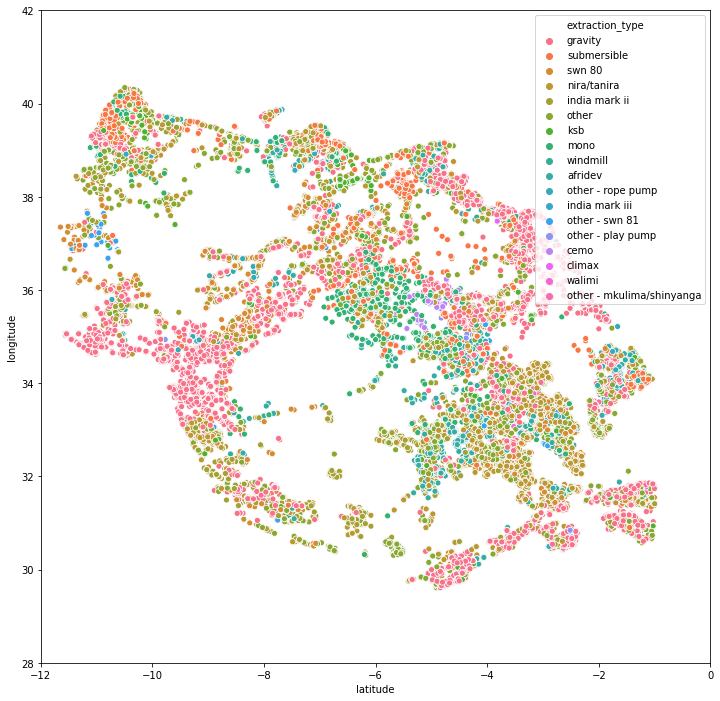

In [88]:
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x='latitude', y='longitude', 
                hue='extraction_type', data=df, ax=ax)
plt.xlim(-12, 0)
plt.ylim(28, 42)

(28.0, 42.0)

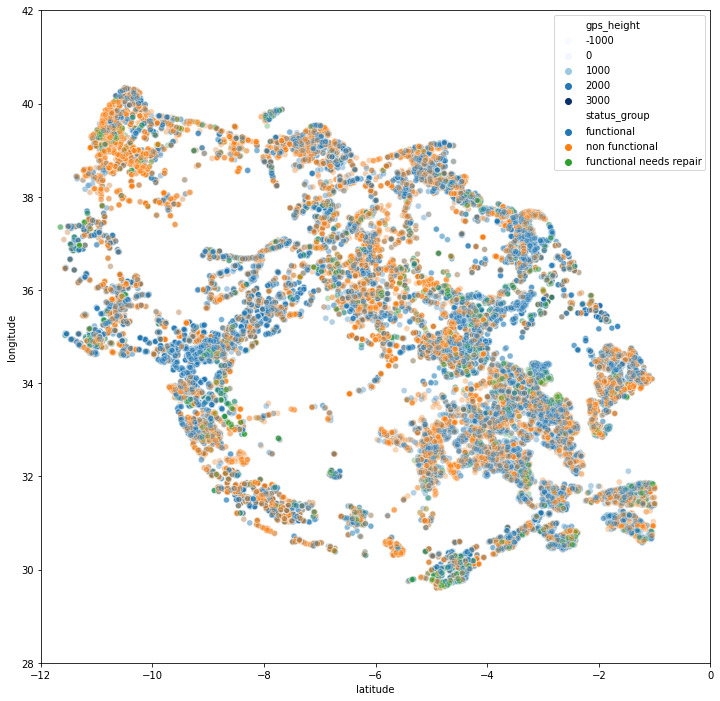

In [99]:
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x='latitude', y='longitude', hue='gps_height', palette='Blues', alpha=0.7, data=df, ax=ax)
sns.scatterplot(x='latitude', y='longitude', 
                hue='status_group', alpha=0.3, data=df, ax=ax)
plt.xlim(-12, 0)
plt.ylim(28, 42)

In [93]:
df.head().drop([1,3])

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,region_code,district_code,population,...,extraction_type,management,management_group,payment_type,quality_group,quantity,source,source_class,waterpoint_type_group,status_group
0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,11,5,109,...,gravity,vwc,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
2,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,21,4,250,...,gravity,vwc,user-group,per bucket,good,enough,dam,surface,communal standpipe,functional
4,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,18,1,0,...,gravity,other,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional
